In [1]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style ('whitegrid') #('white' | 'dark' | 'whitegrid' | 'darkgrid' | 'ticks')

In [2]:
df = sns.load_dataset('flights') # Jan 1949 - Dec 1960
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# Catagorical Grouping 

In [3]:
grouper = {'Jan':'Snow', 'Feb':'Snow', 'Mar':'Snow',
        'Apr':'No Snow', 'May':'No Snow', 'Jun':'No Snow','Jul':'No Snow','Aug':'No Snow',
        'Sep':'No Snow','Oct':'No Snow','Nov':'No Snow', 'Dec':'No Snow',
    }
df['snow'] = df.month.map(grouper)
df.head()

,year,month,passengers,snow
0,1949,Jan,112,Snow
1,1949,Feb,118,Snow
2,1949,Mar,132,Snow
3,1949,Apr,129,No Snow
4,1949,May,121,No Snow


In [4]:
df_summed = df.groupby(['year','snow']).sum(['passengers'])
df_summed.head()

passengers
year snow               
1949 No Snow        1158
     Snow            362
1950 No Snow        1294
     Snow            382
1951 No Snow        1569

# Seaborn - Axes level vs Figure level plots
See https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions

##  Axes level plot 

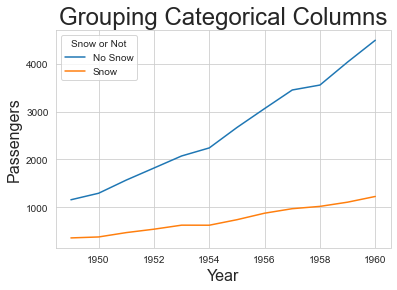

In [5]:
plt.title('Grouping Categorical Columns', fontsize=24)
plt.xlabel('Year', size=16,)
plt.ylabel('Passengers', size=16)
#plt.legend(title='Snow or Not')
g=sns.lineplot(x = "year", y = "passengers", data = df_summed, hue='snow')
g.axes.get_legend().set_title('Snow or Not')

## Figre level plot

Text(0.5, 0.98, 'Grouping Categorical Columns')

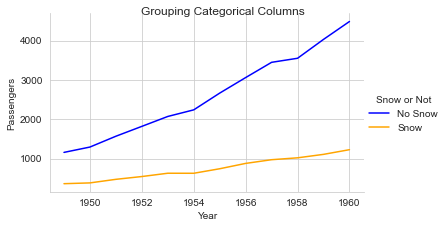

In [6]:
g = sns.relplot(x='year', y='passengers', 
                data=df_summed,
                hue='snow',
                #col='snow',
                aspect=1.7,
                height=3,
                palette=['blue', 'orange'],
                kind='line'
               )
#g.set_titles(col_template="")
g.set_xlabels("Year")
g.set_ylabels('Passengers');
g.legend.set_title('Snow or Not')
g.fig.suptitle('Grouping Categorical Columns')

# Grouping based on distribution criteria

In [7]:
df

,year,month,passengers,snow
0,1949,Jan,112,Snow
1,1949,Feb,118,Snow
2,1949,Mar,132,Snow
3,1949,Apr,129,No Snow
4,1949,May,121,No Snow
...,...,...,...,...
139,1960,Aug,606,No Snow
140,1960,Sep,508,No Snow
141,1960,Oct,461,No Snow
142,1960,Nov,390,No Snow


In [8]:
df['ranking']='Bad'
df.loc [ df['passengers'] > 500, ['ranking'] ] = 'Best'
df.loc [ df['passengers'].between(400,500,inclusive='left'),['ranking']] = 'Good'
df['to_count']=1
df

2022-01-12 16:06:17.004 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,year,month,passengers,snow,ranking,to_count
0,1949,Jan,112,Snow,Bad,1
1,1949,Feb,118,Snow,Bad,1
2,1949,Mar,132,Snow,Bad,1
3,1949,Apr,129,No Snow,Bad,1
4,1949,May,121,No Snow,Bad,1
...,...,...,...,...,...,...
139,1960,Aug,606,No Snow,Best,1
140,1960,Sep,508,No Snow,Best,1
141,1960,Oct,461,No Snow,Good,1
142,1960,Nov,390,No Snow,Bad,1


In [9]:
df_ranked = df.groupby(['year','ranking']).sum('to_count')
df_ranked

passengers  to_count
year ranking                      
1949 Bad            1520        12
1950 Bad            1676        12
1951 Bad            2042        12
1952 Bad            2364        12
1953 Bad            2700        12
1954 Bad            2867        12
1955 Bad            3408        12
1956 Bad            3121        10
     Good            818         2
1957 Bad            2663         8
     Good           1758         4
1958 Bad            2737         8
     Best            505         1
     Good           1330         3
1959 Bad            1460         4
     Best           1107         2
     Good           2573         6
1960 Bad             781         2
     Best           2271         4
     Good           2662         6

Text(0.5, 0.98, 'Grouping based on distribution criteria')

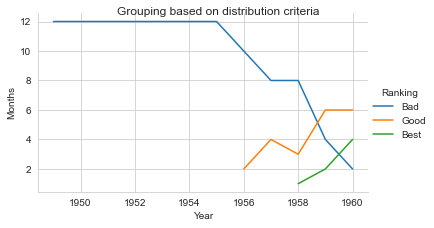

In [10]:
g = sns.relplot(x='year', y='to_count', 
                data=df_ranked,
                hue='ranking',
                #col='snow',
                aspect=1.7,
                height=3,
                kind='line'
               )
#g.set_titles(col_template="")
g.set_xlabels("Year")
g.set_ylabels('Months');
g.legend.set_title('Ranking')
g.fig.suptitle('Grouping based on distribution criteria')

##  Grouping by two criteria

In [11]:
df_double_ranked = df.groupby(['year','ranking','snow']).sum('to_count')
df_double_ranked

passengers  to_count
year ranking snow                         
1949 Bad     No Snow        1158         9
             Snow            362         3
1950 Bad     No Snow        1294         9
             Snow            382         3
1951 Bad     No Snow        1569         9
             Snow            473         3
1952 Bad     No Snow        1820         9
             Snow            544         3
1953 Bad     No Snow        2072         9
             Snow            628         3
1954 Bad     No Snow        2240         9
             Snow            627         3
1955 Bad     No Snow        2666         9
             Snow            742         3
1956 Bad     No Snow        2243         7
             Snow            878         3
     Good    No Snow         818         2
1957 Bad     No Snow        1691         5
             Snow            972         3
     Good    No Snow        1758         4
1958 Bad     No Snow        1717         5
             Snow           1020         3
     Best    No Snow         505         1
     Good    No Snow        1330         3
1959 Bad     No Snow         758         2
             Snow            702         2
     Best    No Snow        1107         2
     Good    No Snow        2167         5
             Snow            406         1
1960 Bad     No Snow         390         1
             Snow            391         1
     Best    No Snow        2271         4
     Good    No Snow        1826         4
             Snow            836         2

Text(0.5, 1.04, 'Grouping based on distribution criteria')

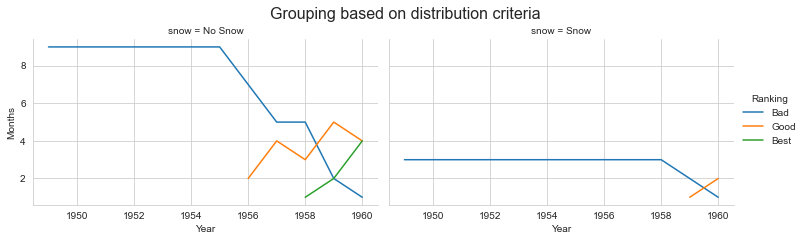

In [12]:
g = sns.relplot(x='year', y='to_count', 
                data=df_double_ranked,
                hue='ranking',
                col='snow',
                aspect=1.7,
                height=3,
                kind='line'
               )
#g.set_titles(col_template="")
g.set_xlabels("Year")
g.set_ylabels('Months');
g.legend.set_title('Ranking')
g.fig.suptitle('Grouping based on distribution criteria', fontsize=16,y=1.04)